# S03 T02: Visualització gràfica de Múltiples variables

## Exercici 1. Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## <span style=color:red>Ejercicio Practico -- Scatter Plots</span>

<span style=color:blue>Scatter Plots o Gráficos de Puntos</span> pueden ser muy utiles para examinar las relationes existentes entre dos series de datos uni-dimensionales. 

Usaremos el dataset <span style=color:darkred>tips</span>, selecionaremos unas cuantas variables. 

In [3]:
tips = pd.read_csv('C:\\Users\\Silvia\\Desktop\\rubenIT\\DataSources\\tips.csv', sep = ',', encoding = 'utf-8')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.shape

(244, 7)

In [5]:
tips.ndim

2

In [6]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [7]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [8]:
tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21


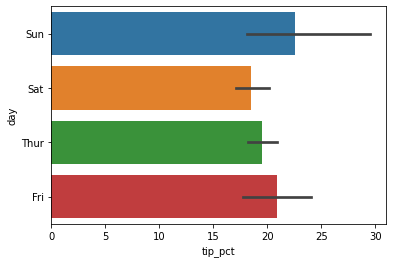

In [9]:
sns.barplot(x='tip_pct', y='day', data=tips, orient="h")
plt.show()

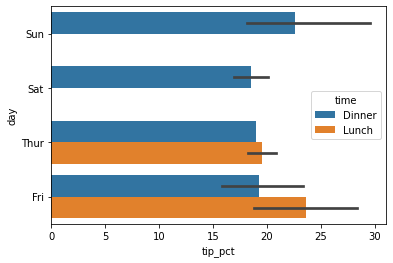

In [10]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
plt.show()
sns.set(style="darkgrid")

In [11]:
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,20.212418
std,8.902412,1.383638,0.951100,16.338588
min,3.070000,1.000000,1.000000,3.700000
25%,13.347500,2.000000,2.000000,14.830000
50%,17.795000,2.900000,2.000000,18.310000
75%,24.127500,3.562500,3.000000,23.682500
max,50.810000,10.000000,6.000000,245.240000


In [12]:
round(tips.describe(include='all'), 3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
count,244.000,244.000,244,244,244,244,244.000,244.000
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570,20.212
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951,16.339
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000,3.700
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000,14.830
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000,18.310
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000,23.682


In [13]:
tips.isnull().sum()/len(tips)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
tip_pct       0.0
dtype: float64

In [14]:
round((tips['tip']).describe(), 3)

count    244.000
mean       2.998
std        1.384
min        1.000
25%        2.000
50%        2.900
75%        3.562
max       10.000
Name: tip, dtype: float64

In [17]:
#Original (tips['tip']).median().round(3) gives an error: 'float' object has no attribute.
#In stackoverflow I found the solution:
#The problem is that round is a built-in top level function, not a method on floats. Change:
#history['test_acc'][-1].round(4) to: round(history['test_acc'][-1], 4)

round(tips['tip'].median(),3)

2.9

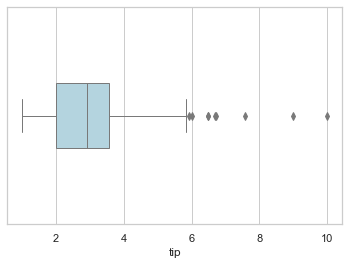

In [18]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = tips['tip'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)

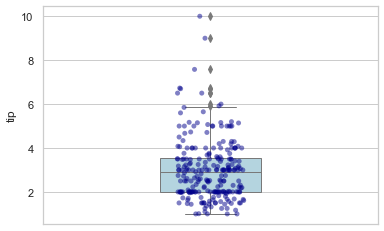

In [19]:
ax = sns.boxplot(y="tip", data=tips,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=tips["tip"], orient='v', color='darkblue', alpha= 0.5)

<span style=color:blue><font size=4><b><u>Una Variable</u></b>: 1 Numérica = 'tip_pct'</font></span>

In [20]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
tip_pct       float64
dtype: object

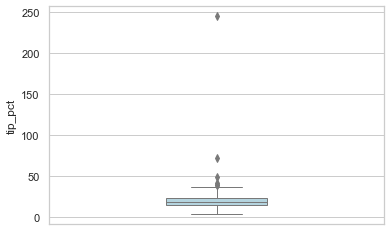

In [21]:
sns.boxplot(y="tip_pct", data=tips[tips.tip < 10],  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3);

<span style=color:blue><font size=4><b><u>Dos Variables</u></b>: 1 Categórica = 'day', 1 Numérica = 'tip_pct'</font></span>

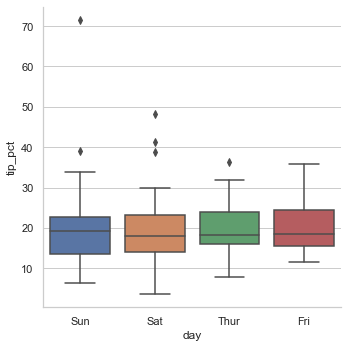

In [22]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

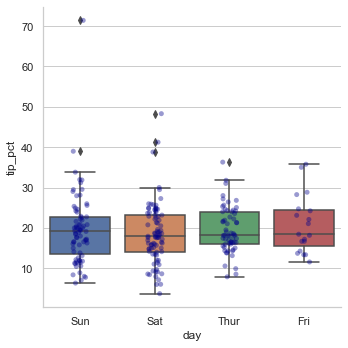

In [23]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

ax = sns.stripplot(x='day', y='tip_pct', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

<span style=color:blue><font size=4><b><u>Tres Variables</u></b> : 2 Categóricas = ('day', 'time'), 1 Numérica = 'tip_pct'</font></span>

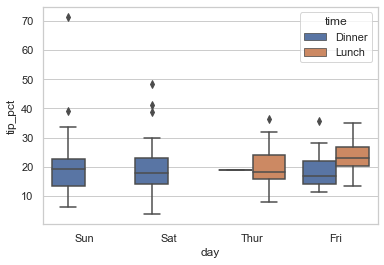

In [24]:
sns.boxplot(x='day', y='tip_pct', hue='time', 
               data=tips[tips.tip_pct < 245]);

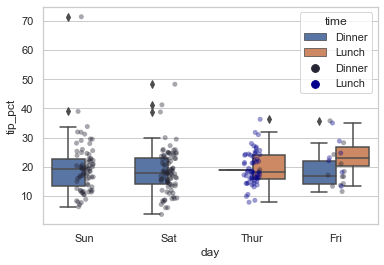

In [25]:
sns.boxplot(x='day', y='tip_pct', hue = 'time',
               data=tips[tips.tip_pct < 245]);
ax = sns.stripplot(x='day', y='tip_pct', hue='time', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

## <span style=color:blue>Facet Grids y Categorical DataFrame</span>

Nos permite profundizar todavía más en el analysis, añadiendo una variable categórica adicional. 

Usando el método <span style=color:darkred><b>factorplot( )</b></span> de <span style=color:darkred>"Facet Grid"</span> :

<span style=color:blue><font size=4><b><u>Cuatro Variables</u></b> : 3 Categoricas = ('day', 'time', 'smoker'), 1 Numérica = 'tip_pct'</font></span>

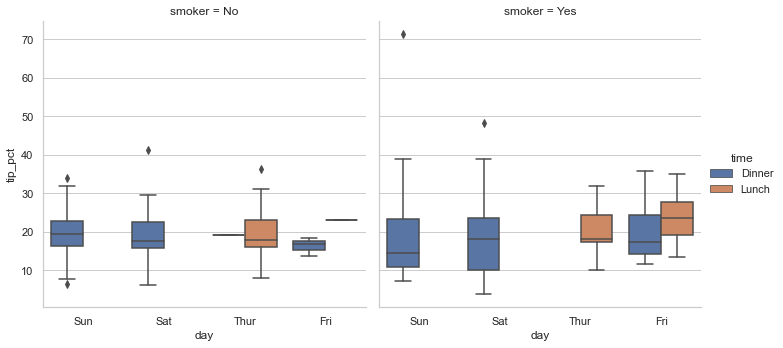

In [26]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);

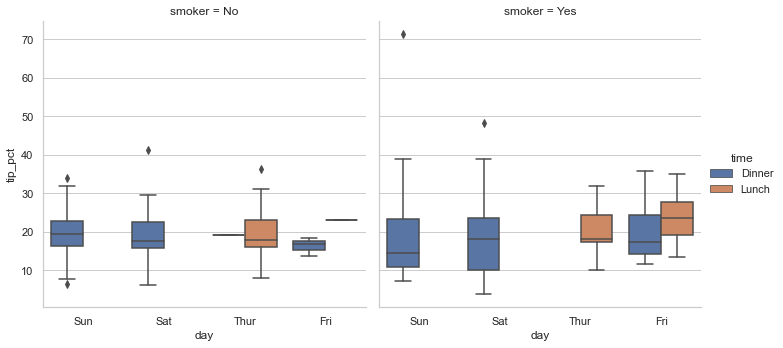

In [27]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);

## Exercici 2. Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
movies00 = pd.read_csv("C:\\Users\\Silvia\\Desktop\\rubenIT\\DataSources\\movies.dat",
                     sep = "[:()::||]",
                     engine='python',
                     header = None,
                     usecols=[0, 1, 2, 3,4,5,6,7,8],
                     names = ['index','noImport1','title','year','noImport4', 'noImport5', 'genre01','genre02','genre03'],
                     encoding="iso-8859-1")
movies01=movies00.iloc[:,np.r_[0,2,3,6,7,8]]
movies01.head()

,index,title,year,genre01,genre02,genre03
0,1,Toy Story,1995,Animation,Children's,Comedy
1,2,Jumanji,1995,Adventure,Children's,Fantasy
2,3,Grumpier Old Men,1995,Comedy,Romance,None
3,4,Waiting to Exhale,1995,Comedy,Drama,None
4,5,Father of the Bride Part II,1995,Comedy,None,None


In [12]:
movies01.shape

(3883, 6)

In [13]:
movies01.ndim

2

In [15]:
movies01.columns

Index(['index', 'title', 'year', 'genre01', 'genre02', 'genre03'], dtype='object')

In [56]:
movies.dtypes

index       int64
title      object
year       object
genre01    object
genre02    object
genre03    object
dtype: object

### A partir d'aquesta part de l'exercici, com que les pel·lícules no tenen numèrics, no el puc provar.

In [8]:
tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21


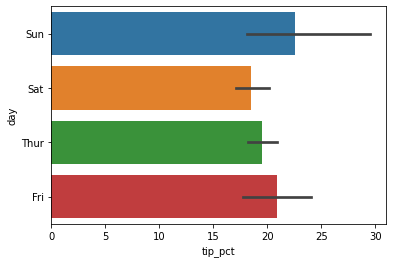

In [9]:
sns.barplot(x='tip_pct', y='day', data=tips, orient="h")
plt.show()

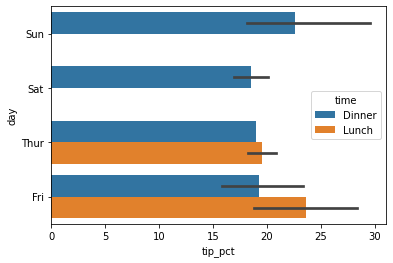

In [10]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
plt.show()
sns.set(style="darkgrid")

In [11]:
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,20.212418
std,8.902412,1.383638,0.951100,16.338588
min,3.070000,1.000000,1.000000,3.700000
25%,13.347500,2.000000,2.000000,14.830000
50%,17.795000,2.900000,2.000000,18.310000
75%,24.127500,3.562500,3.000000,23.682500
max,50.810000,10.000000,6.000000,245.240000


In [12]:
round(tips.describe(include='all'), 3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
count,244.000,244.000,244,244,244,244,244.000,244.000
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570,20.212
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951,16.339
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000,3.700
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000,14.830
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000,18.310
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000,23.682


In [13]:
tips.isnull().sum()/len(tips)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
tip_pct       0.0
dtype: float64

In [14]:
round((tips['tip']).describe(), 3)

count    244.000
mean       2.998
std        1.384
min        1.000
25%        2.000
50%        2.900
75%        3.562
max       10.000
Name: tip, dtype: float64

In [17]:
#Original (tips['tip']).median().round(3) gives an error: 'float' object has no attribute.
#In stackoverflow I found the solution:
#The problem is that round is a built-in top level function, not a method on floats. Change:
#history['test_acc'][-1].round(4) to: round(history['test_acc'][-1], 4)

round(tips['tip'].median(),3)

2.9

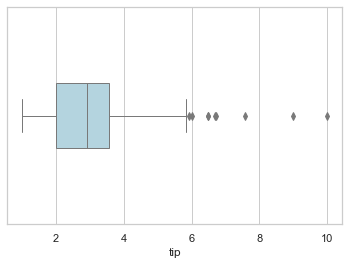

In [18]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = tips['tip'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)

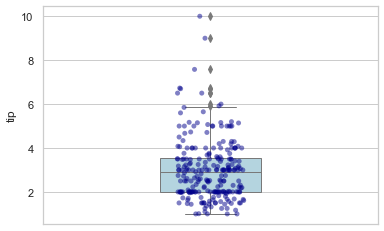

In [19]:
ax = sns.boxplot(y="tip", data=tips,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=tips["tip"], orient='v', color='darkblue', alpha= 0.5)

<span style=color:blue><font size=4><b><u>Una Variable</u></b>: 1 Numérica = 'tip_pct'</font></span>

In [20]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
tip_pct       float64
dtype: object

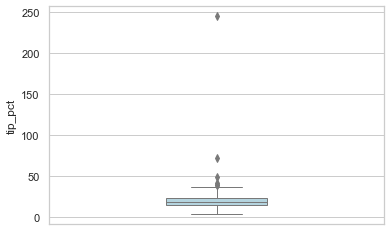

In [21]:
sns.boxplot(y="tip_pct", data=tips[tips.tip < 10],  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3);

<span style=color:blue><font size=4><b><u>Dos Variables</u></b>: 1 Categórica = 'day', 1 Numérica = 'tip_pct'</font></span>

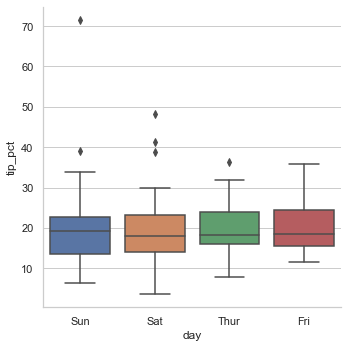

In [22]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

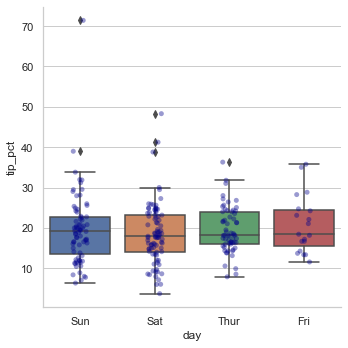

In [23]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

ax = sns.stripplot(x='day', y='tip_pct', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

<span style=color:blue><font size=4><b><u>Tres Variables</u></b> : 2 Categóricas = ('day', 'time'), 1 Numérica = 'tip_pct'</font></span>

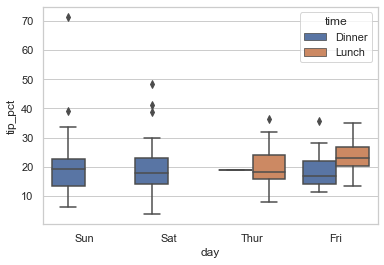

In [24]:
sns.boxplot(x='day', y='tip_pct', hue='time', 
               data=tips[tips.tip_pct < 245]);

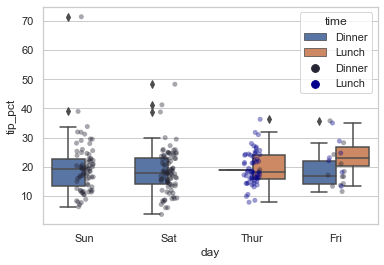

In [25]:
sns.boxplot(x='day', y='tip_pct', hue = 'time',
               data=tips[tips.tip_pct < 245]);
ax = sns.stripplot(x='day', y='tip_pct', hue='time', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

## <span style=color:blue>Facet Grids y Categorical DataFrame</span>

Nos permite profundizar todavía más en el analysis, añadiendo una variable categórica adicional. 

Usando el método <span style=color:darkred><b>factorplot( )</b></span> de <span style=color:darkred>"Facet Grid"</span> :

<span style=color:blue><font size=4><b><u>Cuatro Variables</u></b> : 3 Categoricas = ('day', 'time', 'smoker'), 1 Numérica = 'tip_pct'</font></span>

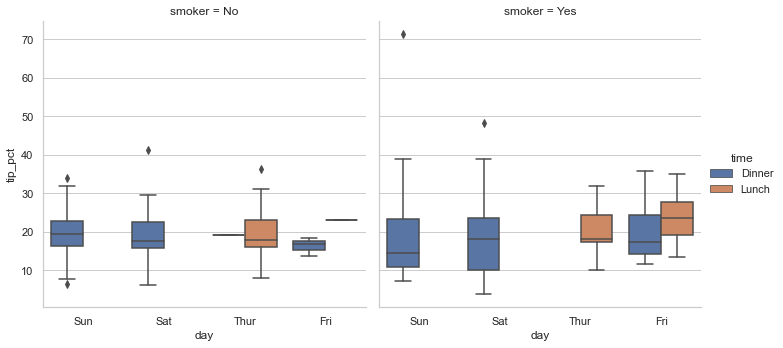

In [26]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);

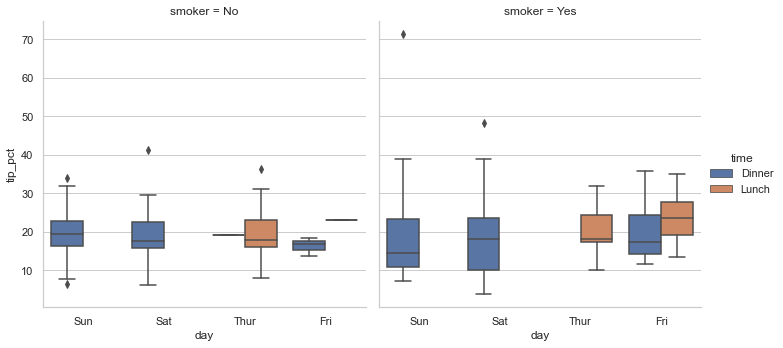

In [27]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);

## Exercici 3. En aquest exercici no us donarem gaires indicacions perquè volem que ens mostreu la vostra creativitat. Sorprèn-me amb gràfiques i interpretacions del dataset "movies.dat" de l'exercici anterior.

In [16]:
print(movies01.head())
print(movies01.info())

   index                         title  year    genre01     genre02  genre03
0      1                    Toy Story   1995  Animation  Children's   Comedy
1      2                      Jumanji   1995  Adventure  Children's  Fantasy
2      3             Grumpier Old Men   1995     Comedy     Romance     None
3      4            Waiting to Exhale   1995     Comedy       Drama     None
4      5  Father of the Bride Part II   1995     Comedy        None     None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    3883 non-null   int64 
 1   title    3883 non-null   object
 2   year     3883 non-null   object
 3   genre01  3432 non-null   object
 4   genre02  1856 non-null   object
 5   genre03  841 non-null    object
dtypes: int64(1), object(5)
memory usage: 182.1+ KB
None


<AxesSubplot:xlabel='year', ylabel='count'>

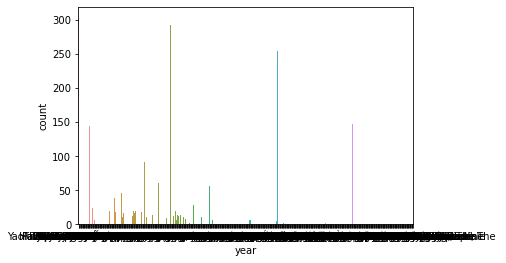

In [17]:
sns.countplot(x='year', data=movies01)

   year  compta
0  1995       1
1  1995       1
2  1995       1
3  1995       1
4  1995       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    3883 non-null   object
 1   compta  3883 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 60.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    530 non-null    object
 1   compta  530 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.4+ KB
None
                           year  compta
0                           3D        1
1           A Cinderella Story        1
2   A Film That Was Never Made        1
3          A Journal of Murder        1
4     A Mediaeval Odyssey, The        1


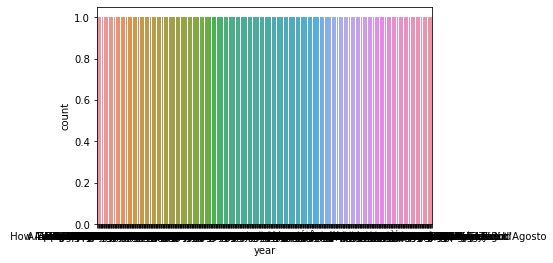

In [22]:
movies01["compta"]=int(1)
movies02=pd.DataFrame(movies01.iloc[:,np.r_[2, 6]])
print(movies02.head())
print(movies02.info())

movies03 = pd.DataFrame(movies02.groupby(["year"]).agg({"compta":"sum"}).reset_index())
print(movies03.info())
print(movies03.head())


fig200=sns.countplot(x='year', data=movies03)